# Titanic project

# Problem Statement:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [170]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [171]:
titanic=pd.read_csv('titanic_project.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [172]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# About the columns:

1.PassengerID- It is unique ID of passenger.

2.Survived- Total no. of passengers survived during the incident.

3.Pclass- It the Passenger's class (1st, 2nd or 3rd class).

4.Name- Name of individual Passenger.

5.Sex- Passenger's sex, whether (Male or Female).

6.Age- Age of passenger's.

7.Sibsp- Number of Siblings or number of Spouses Aboard.

8.Parch- Number of Parents or number of children Aboard.

9.Ticket- Ticket number of passenger.

10.Fare- Ticket fare.

11.Cabin- Cabin number alloted to the respective passenger of 1st class.

12.Embarked- Port from where the passenger boarded the ship.

In [173]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [174]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Droping not so cordinating columns with survived column.

In [175]:
titanic.drop(['PassengerId','Name','Ticket','Fare','Cabin'],inplace=True,axis=1)
titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S


In [176]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [177]:
t={}
for i in titanic.columns:
    t[i]=titanic[i].value_counts().shape[0]
pd.DataFrame(t,index=['category']).transpose()

,category
Survived,2
Pclass,3
Sex,2
Age,88
SibSp,7
Parch,7
Embarked,3


In Embarked only two values are unknown, so we can fill them with the port from where maximum number of people boarded the ship.

In [178]:
titanic['Embarked'].fillna(titanic['Embarked'].value_counts().idxmax(),inplace=True)

In [179]:
titanic['Embarked'].value_counts(dropna=False)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

# Changing String to int values using LabelEncoder:

In [180]:
from sklearn.preprocessing import LabelEncoder

In [181]:
lencode=LabelEncoder()
titanic['Sex']=lencode.fit_transform(titanic['Sex'])
titanic['Embarked']=lencode.fit_transform(titanic['Embarked'])
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,2
887,1,1,0,19.0,0,0,2
888,0,3,0,NaN,1,2,2
889,1,1,1,26.0,0,0,0


# EDA:

Using countplot and kde to see how data is distributed any analyze the relationship.

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

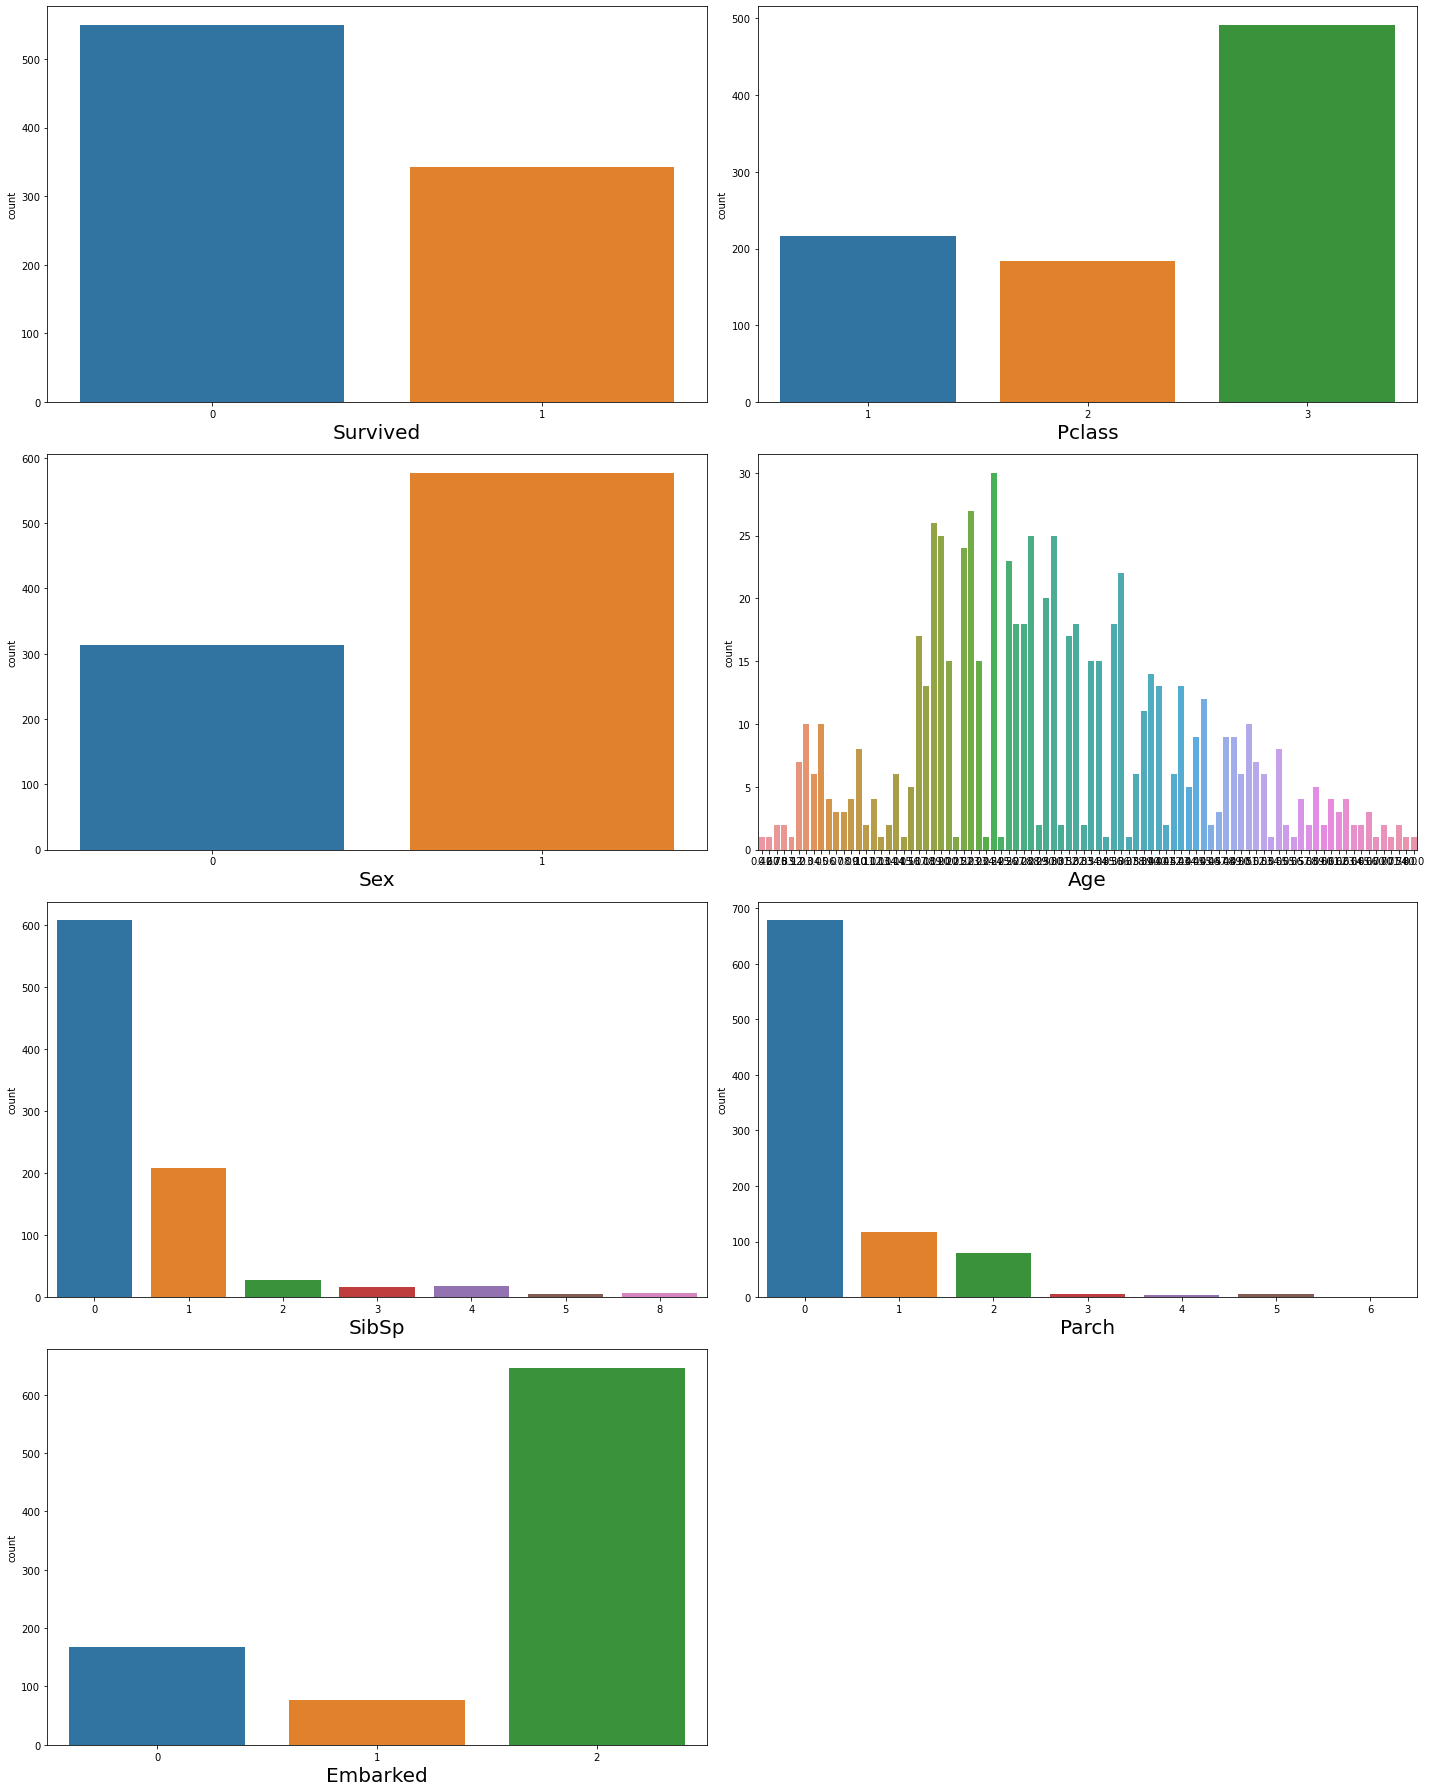

In [183]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in titanic:
    if plotnumber<=16:
        ax=plt.subplot(4,2,plotnumber)
        sns.countplot(titanic[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

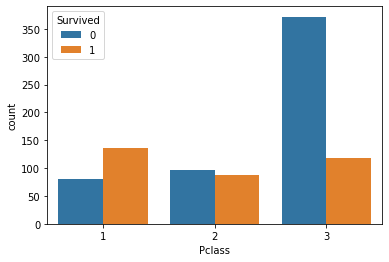

In [184]:
sns.countplot(x='Pclass',hue='Survived',data=titanic)

From this we can interpret that 1st class people survived more.

<AxesSubplot:xlabel='Sex', ylabel='count'>

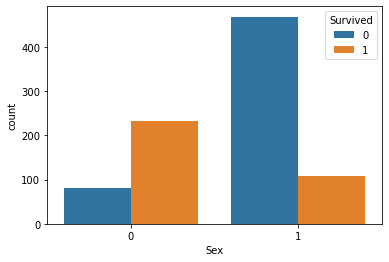

In [185]:
sns.countplot(x='Sex',hue='Survived',data=titanic)

Here we can see, Female survival rate is more than men, whether it may be any class.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

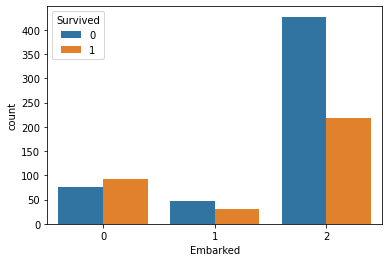

In [186]:
sns.countplot(x='Embarked',hue='Survived',data=titanic)

People who boarded the ship from 'S', have most survival rate.

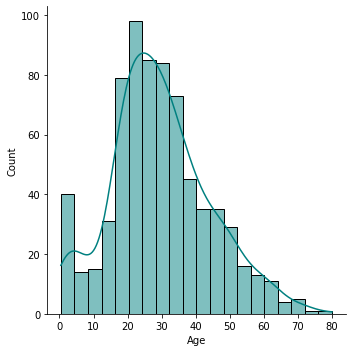

In [187]:
sns.displot(x='Age',kde=True,data=titanic,color='Teal')
plt.show()

Here the 'Age' is skewed right, i.e. most of the data fall on the right side of the curve. To fill the missing values we will check with mean and median and then choose the one accordingly.

In [188]:
titanic['Age'].mean()

29.69911764705882

In [189]:
titanic['Age'].median()

28.0

In [190]:
titanic['Age'].fillna(titanic['Age'].median(skipna=True),inplace=True)

<Figure size 1440x1440 with 0 Axes>

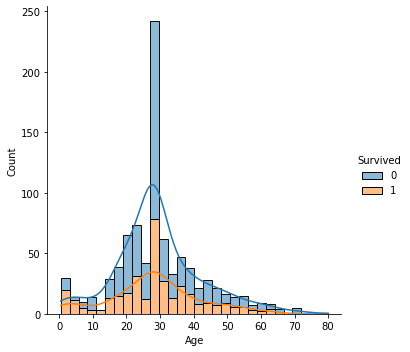

In [191]:
plt.figure(figsize=(20,20))
sns.displot(x='Age',hue='Survived',data=titanic,multiple='stack',kde=True)

# Correlation:

In [192]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,0.162098
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,0.108262
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,-0.018754
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.068230
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.039798
Embarked,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,1.000000


In [193]:
import matplotlib.pyplot as plt

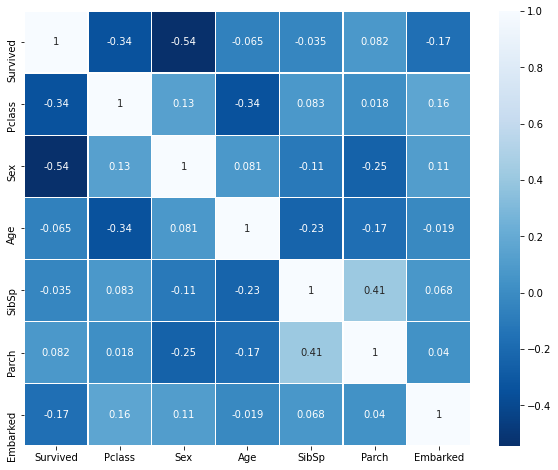

In [194]:
plt.figure(figsize=(10,8))
sns.heatmap(titanic.corr(),annot=True,linewidth=0.2,linecolor='white',cmap='Blues_r')
plt.show()

# Outcome of correlation:

All the columns are positively correlated with the target column.

Max Correlation: 0.082
    
Min Correlation: -0.035

# Describing Datasets:

In [195]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,2.000000


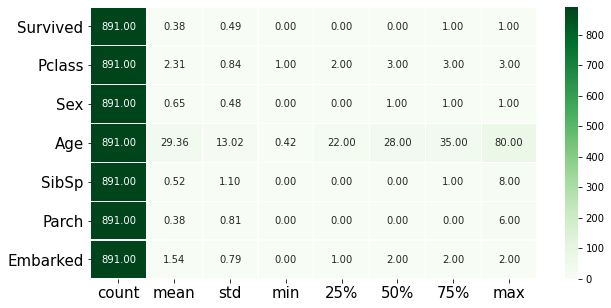

In [196]:
plt.figure(figsize=(10,5))
sns.heatmap(titanic.describe().transpose(),annot=True, fmt='0.2f',linewidth=0.2,cmap='Greens')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# Outcome of describe of datasets:

From above we are determining mean, standard deviation, min. and max. value of each column which will further help in data cleaning.

Total number of rows and columns in dataset:
    
    1.891 rows
    2.7 columns
    
Pclass:
    
    1.Mean=2.31
    2.std.=0.84
    3.max_value=3.00
    4.min_value=1.00
    
Sex:
    
    1.Mean=0.65
    2.std.=0.48
    3.max_value=1.00
    4.min_value=0.00
    
Age:
    
    1.Mean=29.36
    2.std.=13.02
    3.max_value=80
    4.min_value=0.42
    
SibSp:
    
    1.Mean=0.52
    2.std.=1.10
    3.max_value=8.00
    4.min_value=0.00
    
Parch:
    
    1.Mean=0.38
    2.std.=0.81
    3.max_value=6.00
    4.min_value=0.00
    
Embarked:
    
    1.Mean=1.54
    2.std.=0.79
    3.max_value=2.00
    4.min_value=0.00
    
Survived:
    
    1.Mean=0.38
    2.std.=0.49
    3.max_value=1.00
    4.min_value=0.00
    
Survived is our target column.

# Using subplot and distplot to check data are normalised or not, considering mean values.

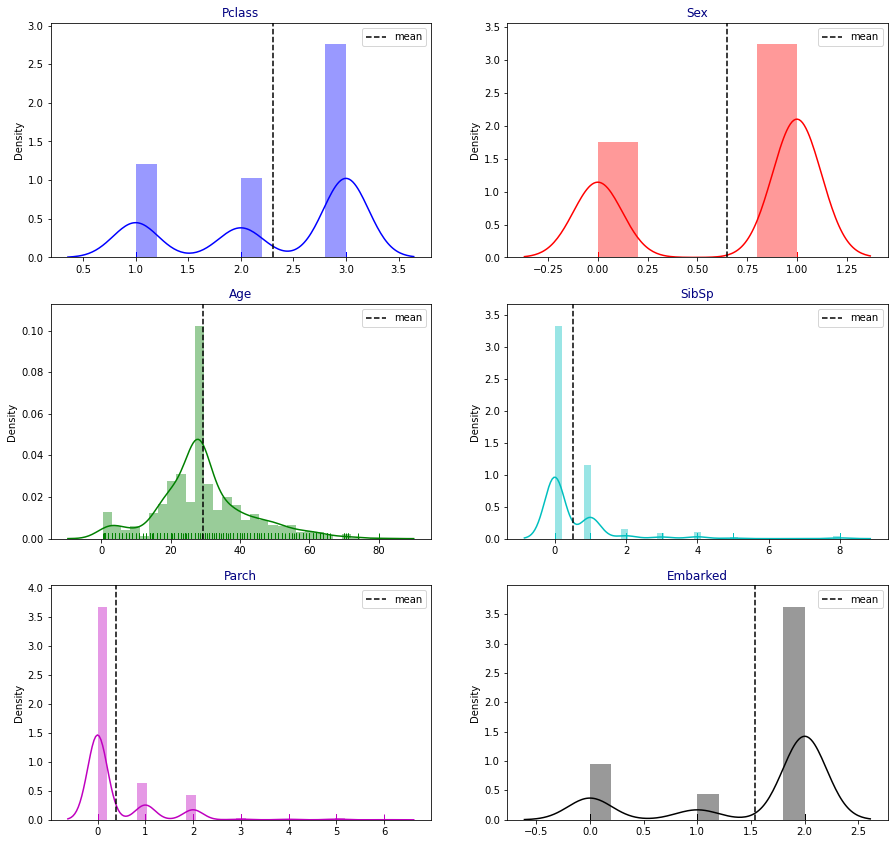

In [197]:
import itertools

cols=['Pclass',
     'Sex',
     'Age',
     'SibSp',
     'Parch',
     'Embarked']
length=len(cols)
cs=['b','r','g','c','m','k']
fig=plt.figure(figsize=(15,25))
for i, j, k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(5,2,j+1)
    ax=sns.distplot(titanic[i],color=k,rug=True)
    ax.set_facecolor('w')
    plt.axvline(titanic[i].mean(),linestyle='--',label='mean',color='k')
    plt.legend(loc='best')
    plt.title(i,color='navy')
    plt.xlabel('')

# Observation:

From above we can see that data is not normalised for some features and we should process with data cleaning.

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Sex'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Embarked'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

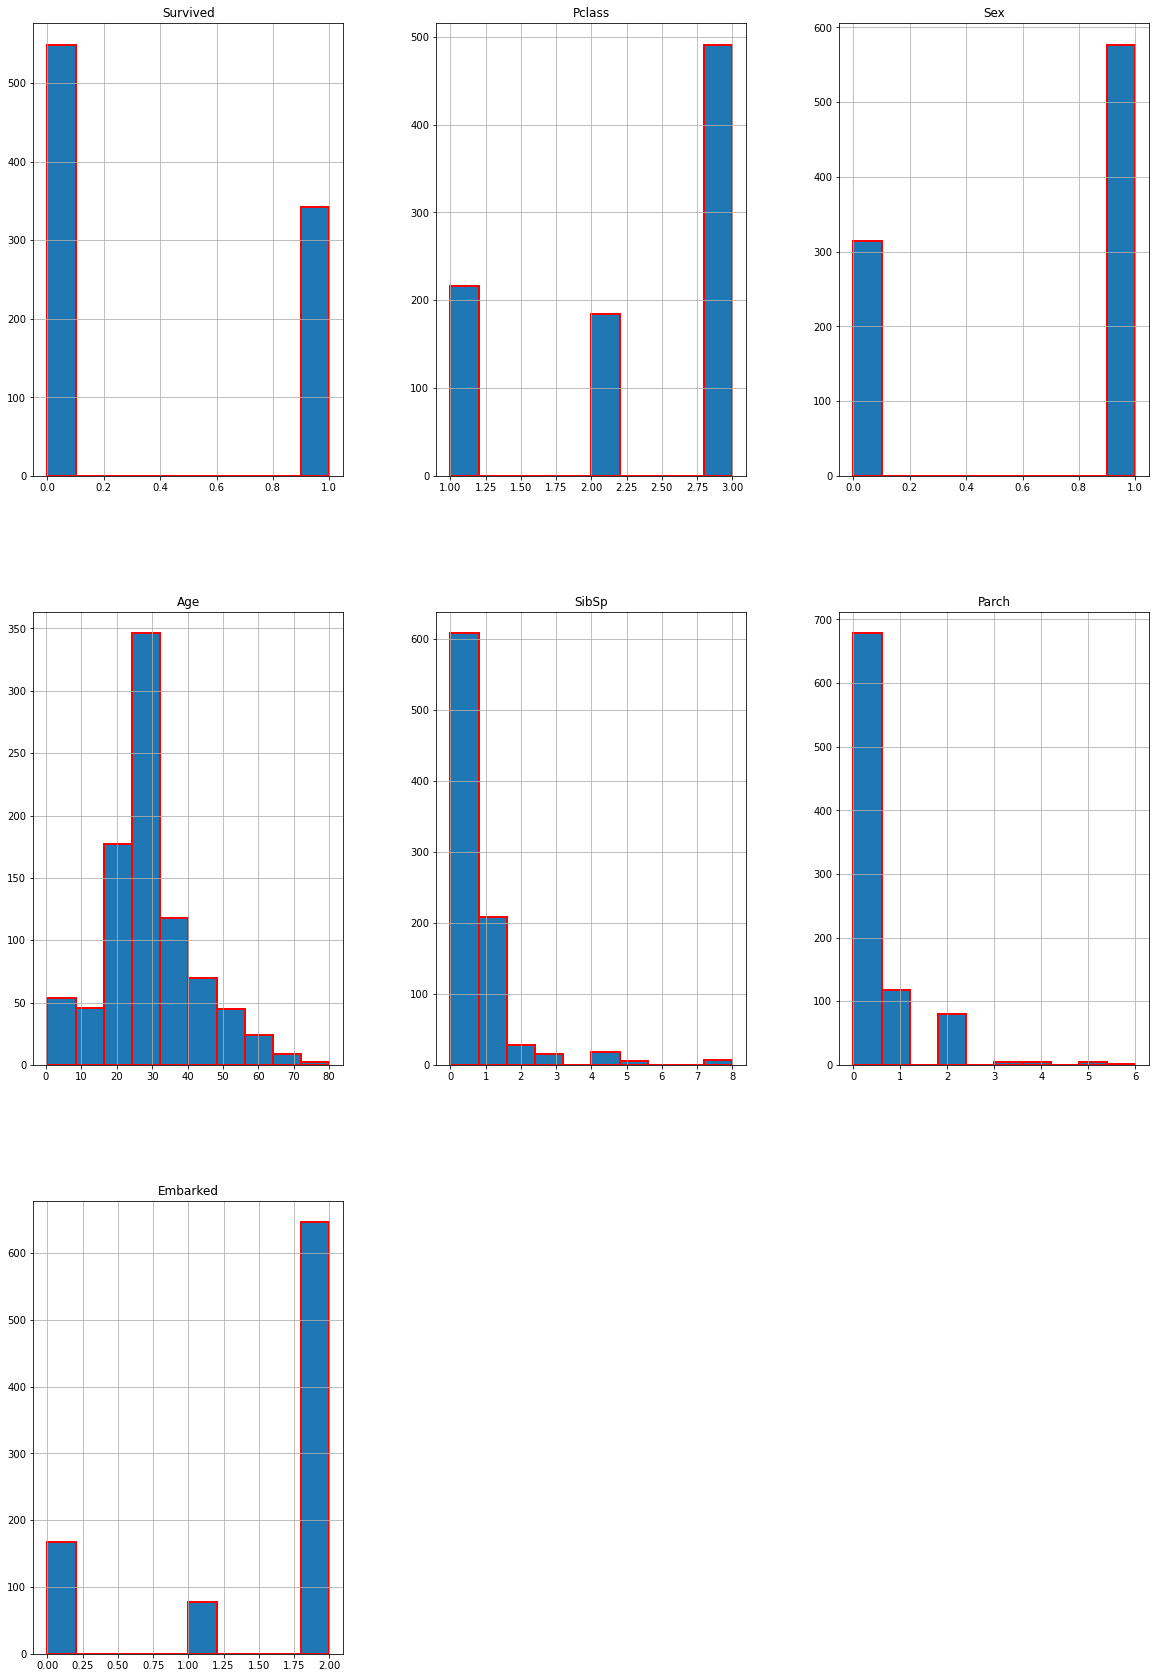

In [198]:
titanic.hist(edgecolor='r',linewidth=2,figsize=(20,30))

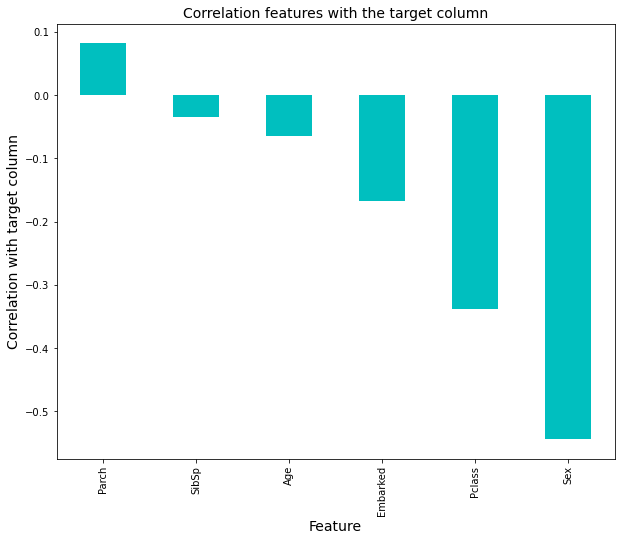

In [199]:
plt.figure(figsize=(10,8))
titanic.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with target column',fontsize=14)
plt.title('Correlation features with the target column',fontsize=14)
plt.show()

In [200]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [201]:
titanic.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.510245
SibSp       3.695352
Parch       2.749117
Embarked   -1.264823
dtype: float64

Again checking for 'SibSp' and 'Parch'

<AxesSubplot:xlabel='SibSp', ylabel='count'>

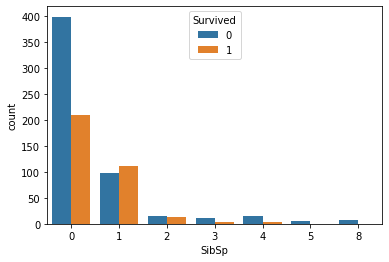

In [202]:
sns.countplot(x='SibSp',hue='Survived',data=titanic)

<AxesSubplot:xlabel='Parch', ylabel='count'>

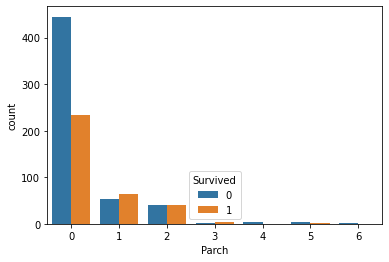

In [203]:
sns.countplot(x='Parch',hue='Survived',data=titanic)

Here SibSp, refers to Sibllings and Spouse, and Parch refers to Parents and children. So we can consider them as one unit. Combining SibSp and Parch as 'Family'

In [204]:
import numpy as np

titanic['Family']=np.where((titanic['SibSp']+titanic['Parch'])>0,0,1)

In [205]:
titanic.drop(['SibSp','Parch'],axis=1,inplace=True)
titanic

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,1,22.0,2,0
1,1,1,0,38.0,0,0
2,1,3,0,26.0,2,1
3,1,1,0,35.0,2,0
4,0,3,1,35.0,2,1
...,...,...,...,...,...,...
886,0,2,1,27.0,2,1
887,1,1,0,19.0,2,1
888,0,3,0,28.0,2,0
889,1,1,1,26.0,0,1


<AxesSubplot:xlabel='Family', ylabel='count'>

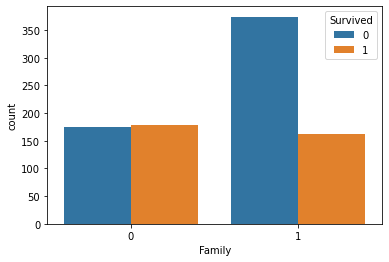

In [206]:
sns.countplot(x='Family',hue='Survived',data=titanic)

As we can see, Embarked is not affecting our dataset much, so we can drop it.

In [207]:
titanic.drop(['Embarked'],axis=1,inplace=True)

In [208]:
titanic.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.510245
Family     -0.420431
dtype: float64

# Skewness:

We are skewness thresholds as +/-0.5. From following none of the column is not under high skewness.

Pclass, skewness=-0.630548, Sex, skewness=-0.618921

In [209]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   Family    891 non-null    int32  
dtypes: float64(1), int32(2), int64(2)
memory usage: 28.0 KB


From above we can have columns datatype and memory used by the dataframe.

# Outliers Checking:

To check outliers we are using box plot.

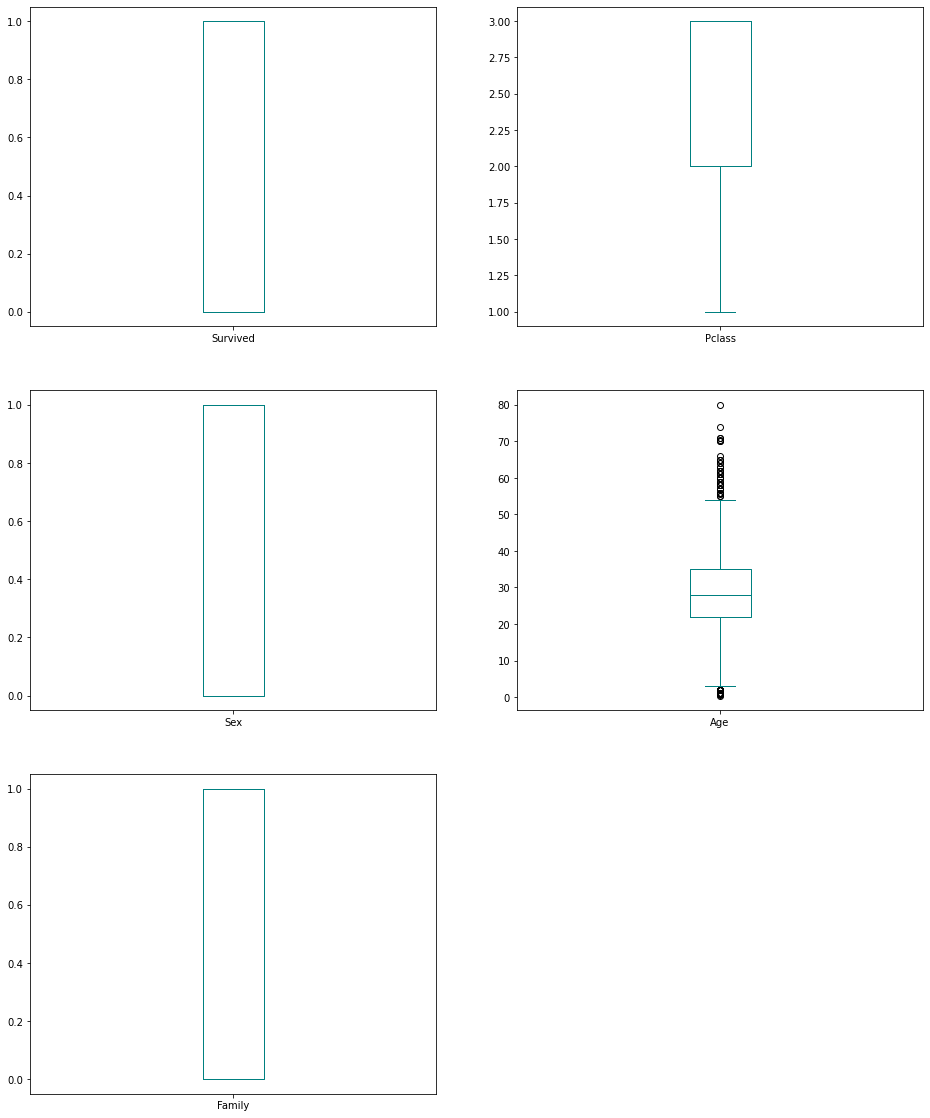

In [210]:
titanic.plot(kind='box',subplots=True,layout=(3,2),figsize=(16,20),color='Teal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

From above we can see, only 'Age' is having outliers.

# Removing outliers:

Checking the percentage of data falling under outliers.

In [211]:
from scipy.stats import zscore
import numpy as np

In [212]:
z=np.abs(zscore(titanic))
z.shape

(891, 5)

In [213]:
threshold=3
print(np.where(z>3))

(array([ 96, 116, 493, 630, 672, 745, 851], dtype=int64), array([3, 3, 3, 3, 3, 3, 3], dtype=int64))


In [214]:
titanic_new=titanic[(z<3).all(axis=1)]
print(titanic.shape)
print(titanic_new.shape)

(891, 5)
(884, 5)


# Percentage Data loss:

In [215]:
loss_percent=(891-884)/891*100
loss_percent

0.7856341189674524

Percentage loss is not more than 5 percent, hence we will continue with this data.

# Dividing data in features and vectors.

In [216]:
x=titanic_new.drop(columns=['Survived'])
y=titanic_new['Survived']

In [217]:
x.dtypes

Pclass      int64
Sex         int32
Age       float64
Family      int32
dtype: object

Observing relationship between features and target vectors.

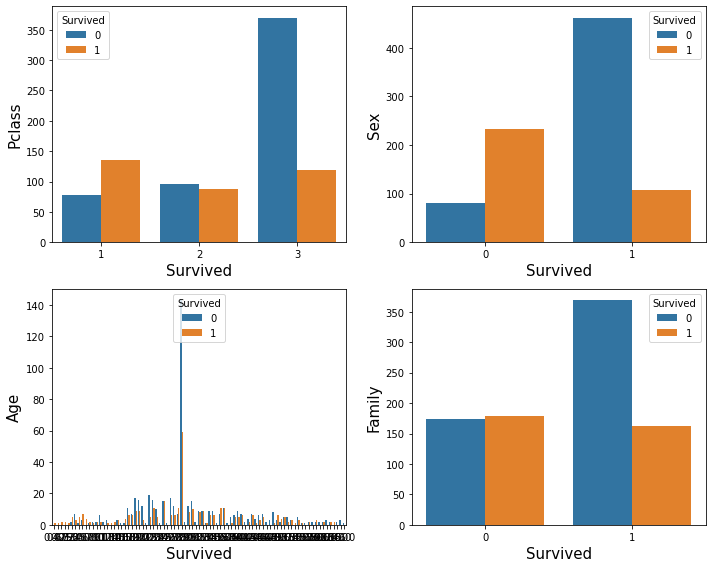

In [218]:
plt.figure(figsize=(10,8),facecolor='w')
plotnumber=1

for column in x:
    if plotnumber<=10:
        ax=plt.subplot(2,2,plotnumber)
        sns.countplot(x[column],hue=y)
        plt.xlabel('Survived',fontsize=15)
        plt.ylabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

# Transforming data to remove skewness:

In [219]:
titanic.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.510245
Family     -0.420431
dtype: float64

Outcome of skewness, normal skewness is between +/-0.5

Column which are not under the normal skewness range:
    
    Pclass
    Sex

Using power transform to remove skewness:

In [220]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.86095556,  0.74221102, -0.5307829 , -1.22647841],
       [-1.4647176 , -1.34732573,  0.72982186, -1.22647841],
       [ 0.86095556, -1.34732573, -0.20578062,  0.81534252],
       ...,
       [ 0.86095556, -1.34732573, -0.04606805, -1.22647841],
       [-1.4647176 ,  0.74221102, -0.20578062,  0.81534252],
       [ 0.86095556,  0.74221102,  0.26849834,  0.81534252]])

Applying Standard Scaler.

In [221]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
x_t

array([[ 0.86095556,  0.74221102, -0.5307829 , -1.22647841],
       [-1.4647176 , -1.34732573,  0.72982186, -1.22647841],
       [ 0.86095556, -1.34732573, -0.20578062,  0.81534252],
       ...,
       [ 0.86095556, -1.34732573, -0.04606805, -1.22647841],
       [-1.4647176 ,  0.74221102, -0.20578062,  0.81534252],
       [ 0.86095556,  0.74221102,  0.26849834,  0.81534252]])

In [222]:
y.value_counts()

0    543
1    341
Name: Survived, dtype: int64

In [223]:
print(x_t.shape)
print(y.shape)

(884, 4)
(884,)


# Applying SMOTE to balance the target column data:

In [224]:
from imblearn.over_sampling import SMOTE

In [225]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x_t,y)

In [226]:
np.bincount(y)

array([543, 341], dtype=int64)

In [227]:
import numpy as np
trainx

array([[ 0.86095556,  0.74221102, -0.5307829 , -1.22647841],
       [-1.4647176 , -1.34732573,  0.72982186, -1.22647841],
       [ 0.86095556, -1.34732573, -0.20578062,  0.81534252],
       ...,
       [-1.4647176 , -1.34732573, -0.28143302,  0.81534252],
       [ 0.86095556, -1.34732573, -0.04606805,  0.81534252],
       [-0.60375486, -1.34732573,  0.2354308 ,  0.81534252]])

In [228]:
print('Brefore applying SMOTE:',y.value_counts())
print('After applying SMOTE:',trainy.value_counts())

Brefore applying SMOTE: 0    543
1    341
Name: Survived, dtype: int64
After applying SMOTE: 0    543
1    543
Name: Survived, dtype: int64


# Model Building:

# Logistic Regression

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [230]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=i,test_size=0.2)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('At ranodm state',i)
        print('Training accuracy_score is:',accuracy_score(y_train,pred_train)*100)
        print('Testing accuracy_score is:',accuracy_score(y_test,pred_test)*100)

At random state 252 The model performs very well
At ranodm state 252
Training accuracy_score is: 78.91705069124424
Testing accuracy_score is: 78.89908256880734
At random state 318 The model performs very well
At ranodm state 318
Training accuracy_score is: 77.99539170506912
Testing accuracy_score is: 77.98165137614679
At random state 372 The model performs very well
At ranodm state 372
Training accuracy_score is: 78.91705069124424
Testing accuracy_score is: 78.89908256880734
At random state 621 The model performs very well
At ranodm state 621
Training accuracy_score is: 77.99539170506912
Testing accuracy_score is: 77.98165137614679


In [231]:
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(trainx,trainy,random_state=385,test_size=0.2)

At random_state=385, we are getting best training and testing accuracy_score.

# Checking different model building techniques:

In [232]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,r2_score
from sklearn.model_selection import cross_val_score

In [233]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train_b,y_train_b)
    svc.score(x_train_b,y_train_b)
    pred_svc=svc.predict(x_test_b)
    svc_c=cross_val_score(svc,x_t,y,cv=3)
    print(accuracy_score(y_test_b,pred_svc))
    print(svc_c.mean())
    print(r2_score(y_test_b,pred_svc))
    print(confusion_matrix(y_test_b,pred_svc))
    print(classification_report(y_test_b,pred_svc))

In [234]:
svmkernel('rbf')

0.7568807339449541
0.8133556247357699
0.01751700680272139
[[92  6]
 [47 73]]
              precision    recall  f1-score   support

           0       0.66      0.94      0.78        98
           1       0.92      0.61      0.73       120

    accuracy                           0.76       218
   macro avg       0.79      0.77      0.76       218
weighted avg       0.81      0.76      0.75       218



In [235]:
svmkernel('poly')

0.7568807339449541
0.7873284907183212
0.01751700680272139
[[91  7]
 [46 74]]
              precision    recall  f1-score   support

           0       0.66      0.93      0.77        98
           1       0.91      0.62      0.74       120

    accuracy                           0.76       218
   macro avg       0.79      0.77      0.76       218
weighted avg       0.80      0.76      0.75       218



In [236]:
svmkernel('linear')

0.7339449541284404
0.7861831738345056
-0.07517006802721049
[[90  8]
 [50 70]]
              precision    recall  f1-score   support

           0       0.64      0.92      0.76        98
           1       0.90      0.58      0.71       120

    accuracy                           0.73       218
   macro avg       0.77      0.75      0.73       218
weighted avg       0.78      0.73      0.73       218



In [237]:
svmkernel('sigmoid')

0.6880733944954128
0.7070102617318114
-0.2605442176870745
[[67 31]
 [37 83]]
              precision    recall  f1-score   support

           0       0.64      0.68      0.66        98
           1       0.73      0.69      0.71       120

    accuracy                           0.69       218
   macro avg       0.69      0.69      0.69       218
weighted avg       0.69      0.69      0.69       218



Here we can see at svmkernel('rbf'), model is performing well and is having least difference in accuray_score and r2_score.

Checking for Decision Tree and KNN.

In [238]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_b,y_train_b)
knn.score(x_train_b,y_train_b)
knn_pred=knn.predict(x_test_b)
knn_c=cross_val_score(knn,x_t,y,cv=5)
print(accuracy_score(y_test_b,knn_pred))
print(knn_c.mean())
print(r2_score(y_test_b,knn_pred))
print(confusion_matrix(y_test_b,knn_pred))
print(classification_report(y_test_b,knn_pred))

0.7981651376146789
0.7986517719568567
0.1843537414965989
[[90  8]
 [36 84]]
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        98
           1       0.91      0.70      0.79       120

    accuracy                           0.80       218
   macro avg       0.81      0.81      0.80       218
weighted avg       0.82      0.80      0.80       218



In [239]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train_b,y_train_b)
dtc.score(x_train_b,y_train_b)
dtc_pred=dtc.predict(x_test_b)
dtc_c=cross_val_score(dtc,x_t,y,cv=5)
print(accuracy_score(y_test_b,dtc_pred))
print(dtc_c.mean())
print(r2_score(y_test_b,dtc_pred))
print(confusion_matrix(y_test_b,dtc_pred))
print(classification_report(y_test_b,dtc_pred))

0.7844036697247706
0.8031651258346173
0.12874149659863976
[[92  6]
 [41 79]]
              precision    recall  f1-score   support

           0       0.69      0.94      0.80        98
           1       0.93      0.66      0.77       120

    accuracy                           0.78       218
   macro avg       0.81      0.80      0.78       218
weighted avg       0.82      0.78      0.78       218



After studying all the models, we can see DTC is performing well, as there is least difference between accuracy_score and cross_val_score.

# Applying Hyperparameter Tuning Grid:

In [240]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [241]:
grid_params={'max_depth':range(2,20,2),
            'min_samples_leaf':range(5,100,10),
            'criterion':['gini','entropy']
            }

In [242]:
grid_search=GridSearchCV(estimator=dtc,param_grid=grid_params,cv=5,n_jobs=-1,verbose=1,scoring='accuracy')

In [243]:
grid_search.fit(x_train_b,y_train_b)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(5, 100, 10)},
             scoring='accuracy', verbose=1)

In [244]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=18, min_samples_leaf=5)


Here we found the best estimator using GridSearch.

In [245]:
grid_search.best_score_

0.7914623613048967

In [246]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=5)
dtc.fit(x_train_b,y_train_b)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5)

In [247]:
dtc.score(x_test_b,y_test_b)

0.7889908256880734

Great!! Our score has improved after using GridSearch.

In [248]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

In [249]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=5)
dtc.fit(x_train_b,y_train_b)
dtc.score(x_train_b,y_train_b)
pred_dtc=dtc.predict(x_test_b)

dtc_r=r2_score(y_test_b,pred_dtc)
print('r2_score is:',dtc_r*100)

dtc_score=cross_val_score(dtc,x_t,y,cv=3)
dtc_c=dtc_score.mean()
print('cross_val_score is:',dtc_c*100)

r2_score is: 14.727891156462613
cross_val_score is: 80.8843537414966


In [250]:
print('Error!!')
print('mean absolute error:',mean_absolute_error(y_test_b,pred_dtc))
print('mean squared error:',mean_squared_error(y_test_b,pred_dtc))
print('root mean square error:',np.sqrt(mean_squared_error(y_test_b,pred_dtc)))

Error!!
mean absolute error: 0.21100917431192662
mean squared error: 0.21100917431192662
root mean square error: 0.4593573492521118


In [251]:
#predict the value
print('predicted survived',pred_dtc)
print('actual survived',y_test_b)

predicted survived [0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1
 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0
 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1]
actual survived 130     0
121     1
941     1
643     1
641     1
       ..
622     0
769     0
763     0
876     0
1009    1
Name: Survived, Length: 218, dtype: int64


# AUC ROC Curve:

Area under the curve-Receiver operating characteristics.

In [252]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [253]:
fpr,tpr,thresholds=roc_curve(y_test_b,pred_dtc)

In [254]:
fpr

array([0.        , 0.06122449, 1.        ])

In [255]:
tpr

array([0.        , 0.66666667, 1.        ])

In [256]:
thresholds

array([2, 1, 0], dtype=int64)

In [257]:
from sklearn.metrics import roc_curve,auc

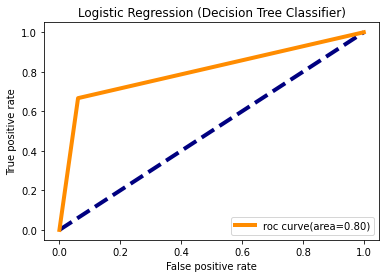

In [258]:
roc_curve=auc(fpr,tpr)
plt.plot([0,1],[0,1],color='navy',lw=4,linestyle='--')
plt.plot(fpr,tpr,label='roc curve(area=%0.2f)'%roc_curve,color='darkorange',lw=4)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression (Decision Tree Classifier)')
plt.legend(loc='lower right')
plt.show()

# Since the model without outliers performing well, we will select that dataframe.

# Model Saving:

In [259]:
import pickle
filename='inhouse_titanic_project.pk5'
pickle.dump(dtc,open(filename,'wb'))

# Conclusion:

In [260]:
import numpy as np
a=np.array(y_test_b)
predicted=np.array(dtc.predict(x_test_b))
titanic_com=pd.DataFrame({'actual':a,'predicted':predicted},index=range(len(a)))
titanic_com

,actual,predicted
0,0,0
1,1,1
2,1,1
3,1,0
4,1,0
...,...,...
213,0,0
214,0,0
215,0,0
216,0,0
